In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_img_arr(img_arr, r, c, dim,titles_arr):
    fl = 0
    fig = plt.figure(figsize = dim)
    for i in range(r):
        for j in range(c):
            if len(img_arr) == fl:
                break
            ax1 = fig.add_subplot(r, c, fl + 1)
            ax1.set_title(titles_arr[fl], fontsize = 20)
            ax1.imshow(img_arr[fl], cmap = 'gray')
            fl = fl + 1
    plt.show()

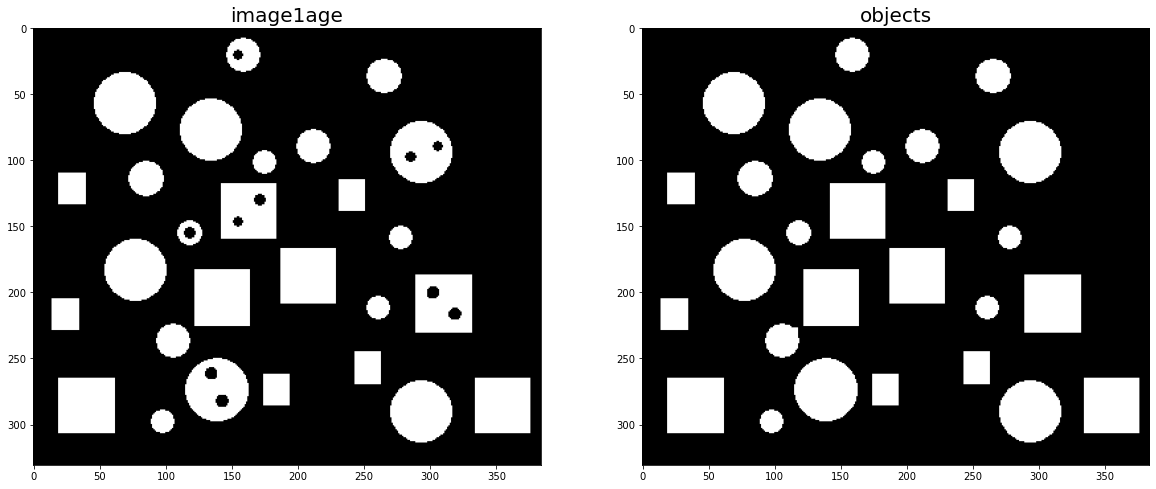

In [3]:
image1 = cv2.imread("images/objects.png",0)
image1 = (image1>127).astype(np.uint8)

objects = cv2.erode(cv2.dilate(image1,np.ones((7,9)),iterations=1),np.ones((7,9)),iterations=1)

hole_img = objects - image1
hole_img = cv2.dilate(cv2.erode(hole_img,np.ones((6,6)),iterations=1),np.ones((6,6)),iterations=1)
display_img_arr([image1,objects,hole_img], 1, 2, (20, 20), ['image1age','objects','hole_img'])



Number of objects with holes 6


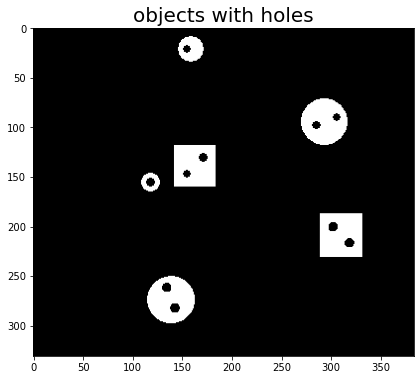

Number of sq 11


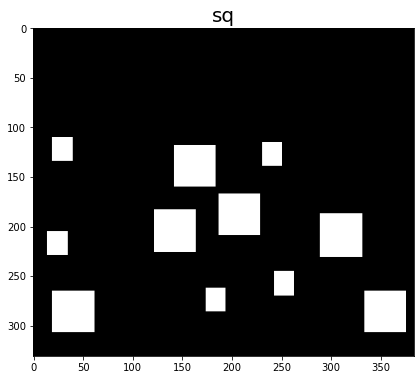

Number of sq with holes 2


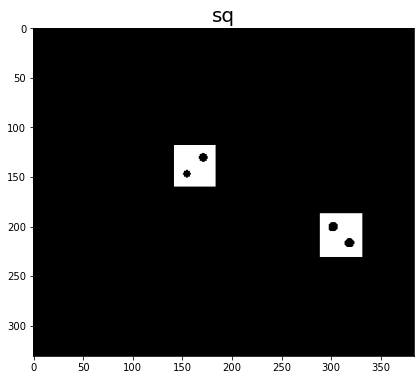

circs with no holes =  12


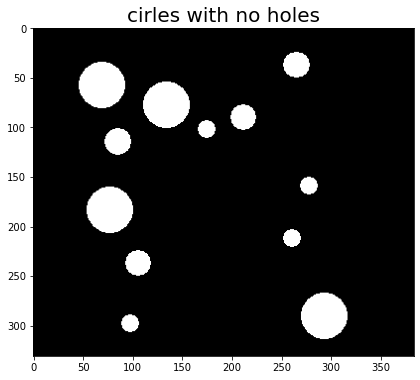

In [4]:

def IterativefourConnComp(i,j,image1,result,Compo_visited):
    if(i<0 or i>=image1.shape[0]):
        return 0
    if(j<0 or j>=image1.shape[1] ):
        return 0
    if(Compo_visited[i,j]):
        return 0
    Compo_visited[i,j] = 1
   
    if(image1[i,j]):
        result[i,j] = 1
        IterativefourConnComp(i+1,j,image1,result,Compo_visited)
        IterativefourConnComp(i,j-1,image1,result,Compo_visited) 
        IterativefourConnComp(i,j+1,image1,result,Compo_visited) 
        IterativefourConnComp(i-1,j,image1,result,Compo_visited) 
    return 0

def component_num(image1,image12):
    n = image1.shape[0]
    m = image1.shape[1]
    count = 0
    Compo_visited = np.zeros((n,m))
    result = np.zeros((n,m),dtype=np.uint16)
    for i in range(n):
        for j in range(m):
            if(image1[i,j]):
                if(Compo_visited[i,j] == 0):
                    count += 1
                    IterativefourConnComp(i,j,image12,result,Compo_visited)
            
    return result, count
        
obj_with_holes,count = component_num(hole_img ,objects)

result_holes = np.logical_and(obj_with_holes,image1)
print("Number of objects with holes",count)
display_img_arr([result_holes.astype(np.uint8)], 1, 2, (15, 15), ['objects with holes'])

def fill_holes(i,SE):
    pad_len = int(SE.shape[0]/2)
    m,n = image1.shape
    result = np.zeros((m,n))
    SE_pixels = SE.size
    padded_image1 = np.pad(i,((pad_len,pad_len),(pad_len,pad_len)),'constant')
    
    for i in range(pad_len,m+pad_len):
        for j in range(pad_len,n+pad_len):
            ar = np.equal(padded_image1[i-pad_len:i+pad_len+1,j-pad_len:j+pad_len+1], SE)
            if np.sum(ar) == SE_pixels:
                result[i-pad_len][j-pad_len] = 1
    result = result.astype(np.uint8)
    return result

sq = fill_holes(objects,np.array([[0,0,0],[0,1,1],[0,1,1]]))
res_sq,count = component_num(sq,objects)
print("Number of sq",count)
display_img_arr([res_sq.astype(np.uint8)], 1, 2, (15, 15), ['sq'])

hole_square = np.logical_and(res_sq,result_holes)
sq,count = component_num(hole_square,hole_square)
print("Number of sq with holes",count)
display_img_arr([hole_square.astype(np.uint8)], 1, 2, (15, 15), ['sq'])


without_holes = image1 - result_holes
circs = fill_holes(without_holes ,np.array([[1,1,0],[1,1,0],[1,0,0]]))
final_circs,count = component_num(circs,without_holes)
print("circs with no holes = ",count)
display_img_arr([final_circs.astype(np.uint8)], 1, 2, (15, 15), ['cirles with no holes'])